# K-means clustering procedure
## Clustering based on all 508 ward
This document applies the k-means algorithm to the 508 wards of Guateng. Each ward is represented as a row vector with 4096 features as extracted by a CNN in a previous section of this project

## Load data and packages

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
TITLE_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE) 

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'

import pandas as pd 
# from plotnine import *

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples,silhouette_score, davies_bouldin_score
import matplotlib.cm as cm

from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

#read in data from csv file
df = pd.read_csv("../data/image_centers/all_features.csv")
df_labels = df.drop(df.columns[3:4099], axis=1) #creating labels for csv file later on
df_labels = df_labels.drop(df_labels.columns[0], axis=1)

df = df.drop([df.columns[0],"Municipality","ward_no."], axis=1) #remove columns that serves as index and naming columns


print(df.shape) #the dataframe is 508 rows (wards) and 4096 columns (features)
df.head()
# df = StandardScaler().fit_transform(df)

(508, 4096)


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,-0.720134,-0.011752,-0.196956,-0.188181,-0.185301,-0.589358,0.190067,-0.182576,0.661260,-0.066985,...,-0.383296,-0.362654,0.125460,0.021607,-0.279668,-0.002370,-0.097725,0.340595,-0.005517,-1.081248
1,-0.648677,0.196469,-0.046444,-0.203042,0.077324,-0.685668,-0.128859,-0.162891,0.463626,-0.011447,...,-0.434731,-0.222764,0.109085,0.066180,0.099601,-0.421368,-0.092743,0.219308,0.142782,-0.888951
2,-0.779101,0.049304,0.334525,-0.348373,-0.081809,-0.724423,-0.346990,-0.049666,0.461621,-0.172035,...,-0.457215,-0.106087,-0.066711,0.066039,-0.171572,-0.420311,-0.069101,0.332208,0.233605,-0.915926
3,-0.601808,-0.065139,0.147482,-0.336250,-0.109590,-0.644383,-0.399426,-0.101277,0.605497,-0.129905,...,-0.391497,-0.179220,0.148247,0.168646,-0.220085,-0.264893,-0.330374,0.462983,0.028194,-0.952793
4,-1.026684,-0.286151,0.411765,-0.535642,-0.197247,-0.962774,-0.467955,-0.328909,1.164673,-0.186016,...,-0.445696,-0.170309,-0.023123,0.089037,-0.367245,-0.257600,-0.490463,0.609728,0.084688,-1.292101


## Dimension reduction
### PCA
Since the dimensionality of our dataset is so large, we first do a principal component analysis to reduce the dimensions. After this, we will repeat the k-means algorithm using a different number of PC's to determine if this makes a significant difference to the final clusters.

#### Maximum PC: 508
The maximum principal components allowed by the sklearn package is the number of observations, 529. The results are as shown below

In [2]:
scale = False
scaler = StandardScaler()
# transform data
# X_scaled = pd.DataFrame(scaler.fit_transform(X))
# X_scaled.head()

df = pd.DataFrame(scaler.fit_transform(df)) if scale else df

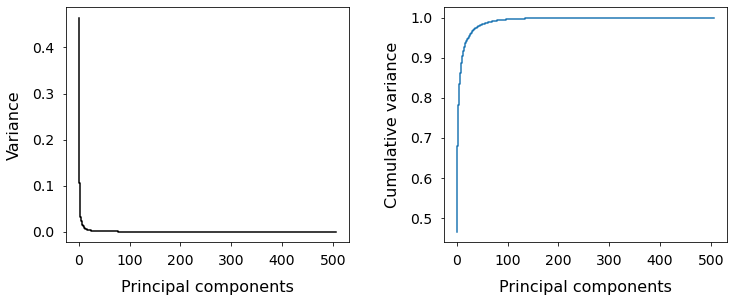

In [3]:
# Create a PCA instance: pca
pca1 = PCA(n_components=508) #create 508 PC's
principalComponents1 = pca1.fit_transform(df) #apply the pc's to the feature set

# Plot the explained variances
features1 = range(pca1.n_components_)

# Save components to a DataFrame
PCA_components1 = pd.DataFrame(principalComponents1)

# compute cumulative variance explained by PC's
var_explained1 = pca1.explained_variance_ratio_
cumulative_var_explained1 = var_explained1.cumsum()

var_df = pd.DataFrame(var_explained1)
var_df.columns = ["Variance Explained"]

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(features1,pca1.explained_variance_ratio_ ,'-o', color='black')
# ax2.step(features1,cumulative_var_explained1)

plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.step(features1,pca1.explained_variance_ratio_, color='black')
plt.ylabel("Variance", fontsize=16, labelpad=10)
plt.xlabel("Principal components", fontsize=16, labelpad=12)

plt.subplot(1,2,2)
plt.step(features1,cumulative_var_explained1)
plt.ylabel("Cumulative variance", fontsize=16, labelpad=10)
plt.xlabel("Principal components", fontsize=16, labelpad=12)

plt.tight_layout(pad=3.0)
# plt.savefig("variance_508.pdf") #save the plot to pdf



# ggplot(var_df, aes(x=features1, y="Variance Explained")) + geom_line() +theme_classic()


From the above plots there seems to be an elbow at the about 5, 20 and 35 PC's. Thus, we will not look at each of these amount of PC's.
### Plotting first 150 and 50 PCA's

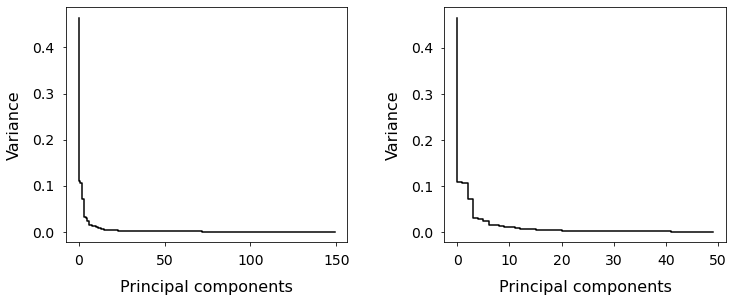

In [4]:
# Create a PCA instance: pca
pca150 = PCA(n_components=150) #create 150 PC's
pca50 = PCA(n_components=50) #create 50 PC's

principalComponents150 = pca150.fit_transform(df) #apply the pc's to the feature set
principalComponents50 = pca50.fit_transform(df) #apply the pc's to the feature set

features150 = range(pca150.n_components_)
features50 = range(pca50.n_components_)

plt.figure(figsize=(11, 5))
ax = plt.subplot(1,2,1)
plt.step(features150,pca150.explained_variance_ratio_, color='black')
plt.ylabel("Variance", fontsize=16, labelpad=10)
plt.xlabel("Principal components", fontsize=16, labelpad=12)


plt.subplot(1,2,2)
plt.step(features50,pca50.explained_variance_ratio_, color='black')
plt.ylabel("Variance", fontsize=16, labelpad=10)
plt.xlabel("Principal components", fontsize=16, labelpad=12)

plt.tight_layout(pad=3.0)
# plt.savefig("variance_150_50.pdf") #save the plot to pdf


Text(41.5, 0.27, '$\\lambda_{40}$')

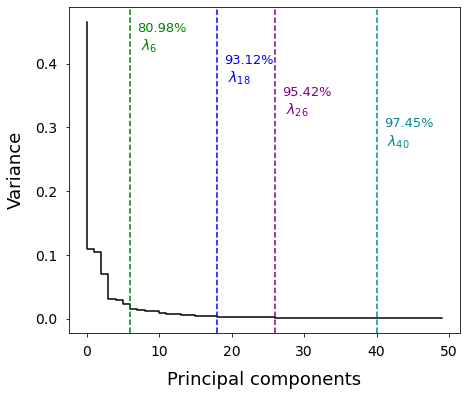

In [5]:
#one more plot to see the variation from the first 50 PC's more clearly

pca60 = PCA(n_components=60) #create 50 PC's

principalComponents60 = pca60.fit_transform(df) #apply the pc's to the feature set

features60 = range(pca60.n_components_)

plt.figure(figsize=(7, 6))
plt.step(features50,pca50.explained_variance_ratio_, color='black')
plt.ylabel("Variance", fontsize=18, labelpad=10)
plt.xlabel("Principal components", fontsize=18, labelpad=12)
plt.grid(False)
plt.axvline(x=6, color="green",ls="--")
plt.axvline(x=18, color="blue",ls="--")
plt.axvline(x=26, color="purple",ls="--")
plt.axvline(x=40, color="darkcyan",ls="--")

plt.text(7, 0.45, "80.98%", color="green", fontsize=13)
plt.text(19, 0.4, "93.12%", color="blue", fontsize=13)
plt.text(27, 0.35, "95.42%", color="purple", fontsize=13)
plt.text(41, 0.3, "97.45%", color="darkcyan", fontsize=13)

plt.text(7.5, 0.42, r'$\lambda_{6}$', color="green", fontsize=14)
plt.text(19.5, 0.37, r'$\lambda_{18}$', color="blue", fontsize=14)
plt.text(27.5, 0.32, r'$\lambda_{26}$', color="purple", fontsize=14)
plt.text(41.5, 0.27, r'$\lambda_{40}$', color="darkcyan", fontsize=14)

# plt.savefig("50_pc_var_indicated.pdf")

There seems to be an elbow at around 25 PC's

### Variance explained by first 6, 18, 26 and 40 PC's
Let's begin by considering the cumulative variance explained by these PC's.

In [6]:
a = np.array(cumulative_var_explained1)
indeces = [5,17,25,39]
print ([a[i] for i in indeces])

[0.8097702877147489, 0.9312303882587317, 0.9542216623222977, 0.9745114672330673]


Note that the first 6 pc's only explain 80.98% of the variation in the data.

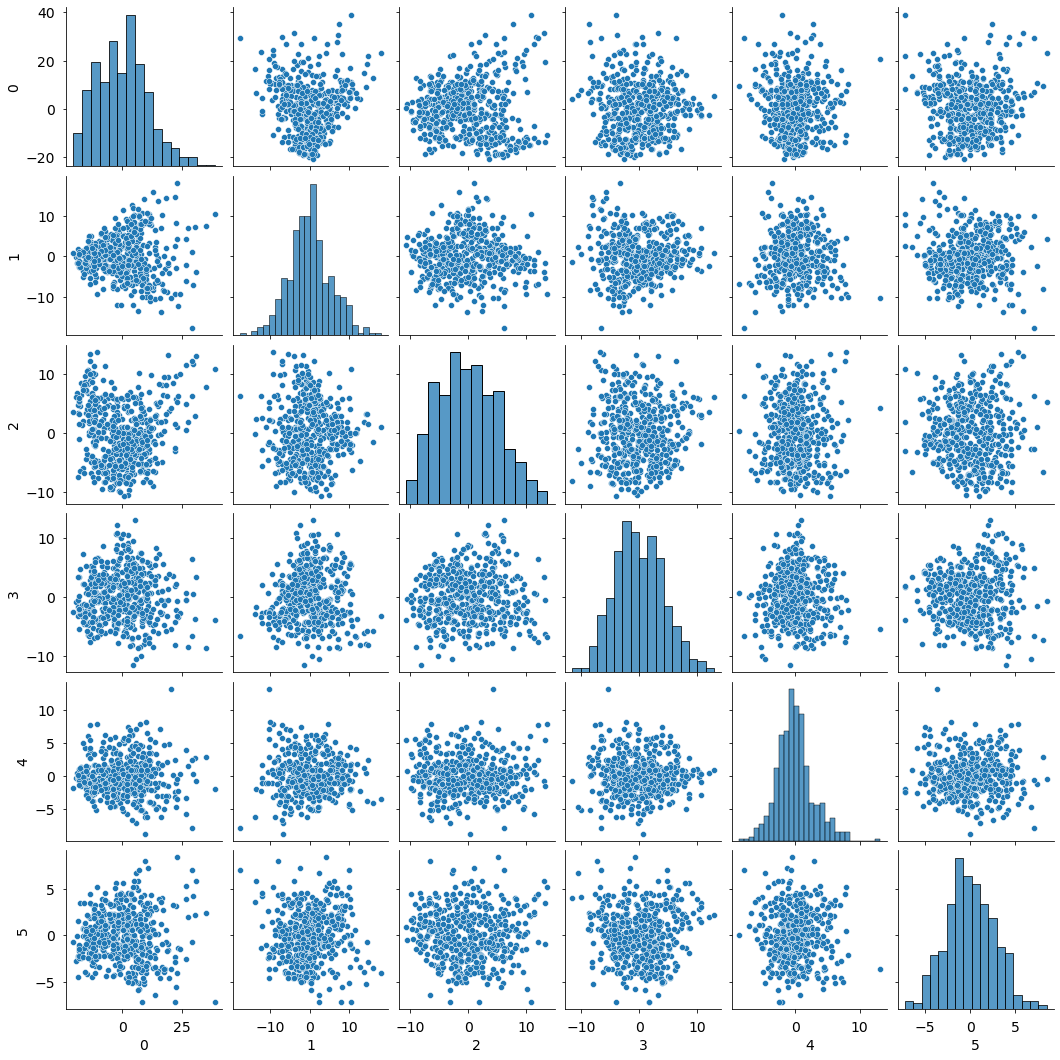

In [7]:
sns.pairplot(PCA_components1.iloc[:,:6])

In [8]:
# PCA_components1 = X_scaled
# PCA_components1.head()

In [9]:
scale = False
scaler = StandardScaler()

PCA_components1 = pd.DataFrame(scaler.fit_transform(PCA_components1)) if scale else PCA_components1
PCA_components1.head()

,0,1,2,3,4,5,6,7,8,9,...,498,499,500,501,502,503,504,505,506,507
0,-5.076268,4.266881,0.809587,-2.978680,-1.277309,1.801608,1.677841,-3.107454,0.389596,0.422751,...,-0.017264,0.001217,0.004934,-0.005022,0.002028,0.012065,0.008158,-0.004625,-0.004246,4.805662e-15
1,-0.721154,-4.826540,-4.425994,0.442247,-3.308051,-1.352832,-2.088803,-0.437611,0.615850,-1.655086,...,-0.000131,-0.000230,0.001535,0.002680,0.001170,-0.000115,-0.001599,0.000846,-0.000555,4.805662e-15
2,-1.855913,-2.534022,-1.699612,5.373496,-2.676584,-0.997830,0.797341,-1.503030,0.370838,0.327728,...,-0.004985,0.002332,-0.001653,-0.003120,0.000471,0.000672,-0.001676,-0.000250,-0.002484,4.805662e-15
3,-2.303890,-1.456174,5.248775,3.239546,-2.565638,0.318080,0.077455,-0.714126,0.295048,0.957377,...,0.005413,0.007550,0.006791,0.001223,0.001422,-0.001028,0.002100,-0.004409,0.001264,4.805662e-15
4,11.026357,0.772518,6.870430,5.641095,-3.904960,3.507357,0.289020,-1.376312,1.779652,2.351835,...,0.003730,-0.003468,-0.001350,-0.003448,-0.000976,0.002545,0.002290,0.002642,-0.004992,4.805662e-15


## HDBSCAN

In [10]:
import hdbscan
from itertools import product

In [36]:
# X = pd.DataFrame(clusterable_embedding).iloc[:,:6]
# X.head()

In [11]:
X = PCA_components1.iloc[:,:18]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-5.076268,4.266881,0.809587,-2.978680,-1.277309,1.801608,1.677841,-3.107454,0.389596,0.422751,-1.159653,-0.698179,0.910519,-1.047397,0.235061,0.068160,-0.453252,0.215496
1,-0.721154,-4.826540,-4.425994,0.442247,-3.308051,-1.352832,-2.088803,-0.437611,0.615850,-1.655086,-1.000947,-0.762811,-1.226246,0.074544,-0.734501,0.104239,0.440623,0.959352
2,-1.855913,-2.534022,-1.699612,5.373496,-2.676584,-0.997830,0.797341,-1.503030,0.370838,0.327728,1.369470,-0.644578,0.265473,-0.203918,0.288098,-0.194351,0.016737,-1.253381
3,-2.303890,-1.456174,5.248775,3.239546,-2.565638,0.318080,0.077455,-0.714126,0.295048,0.957377,0.207443,-0.625556,-0.015602,-0.670103,-0.279263,0.736229,-0.214226,-1.236568
4,11.026357,0.772518,6.870430,5.641095,-3.904960,3.507357,0.289020,-1.376312,1.779652,2.351835,1.056302,-0.180806,1.988438,-1.447740,-0.661380,-0.847092,-0.331773,0.689556


In [12]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02,5.080000e+02
mean,4.475860e-16,1.118965e-16,-2.797412e-16,3.217024e-16,-1.958189e-16,2.797412e-17,1.538577e-16,-1.398706e-16,-4.196119e-17,-6.294178e-17,-1.118965e-16,-2.797412e-17,-4.196119e-17,-1.118965e-16,-1.049030e-16,1.398706e-17,6.993531e-17,6.993531e-17
std,1.083206e+01,5.240373e+00,5.155999e+00,4.223306e+00,2.792039e+00,2.696474e+00,2.414116e+00,1.941706e+00,1.873693e+00,1.754261e+00,1.708992e+00,1.579955e+00,1.406690e+00,1.333795e+00,1.255005e+00,1.220057e+00,1.074021e+00,1.030924e+00
min,-2.077552e+01,-1.757206e+01,-1.072604e+01,-1.154064e+01,-8.756535e+00,-7.212919e+00,-6.181638e+00,-5.638188e+00,-6.168950e+00,-5.061745e+00,-5.355626e+00,-4.562786e+00,-3.991318e+00,-4.492905e+00,-3.233588e+00,-4.327381e+00,-3.582181e+00,-4.817237e+00
25%,-8.397636e+00,-3.184463e+00,-4.078818e+00,-2.986562e+00,-1.764763e+00,-1.817374e+00,-1.458046e+00,-1.349463e+00,-1.145721e+00,-1.138095e+00,-1.205796e+00,-8.905523e-01,-8.586059e-01,-8.049659e-01,-8.311649e-01,-7.050726e-01,-7.783517e-01,-6.013914e-01
50%,-2.124821e-01,-1.643906e-01,-1.969252e-01,-2.308030e-01,-2.174967e-01,-5.180159e-02,-5.634679e-02,-9.863862e-02,1.071297e-01,-4.377096e-02,3.831439e-02,5.092937e-02,4.691179e-02,8.149954e-02,-9.321673e-02,-2.544410e-03,-1.634844e-02,4.070746e-03
75%,7.183582e+00,2.762273e+00,3.729531e+00,2.845900e+00,1.369794e+00,1.882794e+00,1.443900e+00,1.256235e+00,1.236879e+00,1.034240e+00,1.097667e+00,1.057530e+00,9.479437e-01,8.270119e-01,7.405156e-01,7.027748e-01,6.514863e-01,6.484755e-01
max,3.898810e+01,1.796658e+01,1.367753e+01,1.290277e+01,1.320733e+01,8.438370e+00,1.035866e+01,6.364047e+00,8.305284e+00,8.331119e+00,7.140241e+00,4.600257e+00,5.953834e+00,4.667196e+00,4.601935e+00,4.886935e+00,4.253174e+00,5.431946e+00


In [13]:
scale = False
scaler = StandardScaler()


X_scaled = pd.DataFrame(scaler.fit_transform(X)) if scale else X
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-5.076268,4.266881,0.809587,-2.978680,-1.277309,1.801608,1.677841,-3.107454,0.389596,0.422751,-1.159653,-0.698179,0.910519,-1.047397,0.235061,0.068160,-0.453252,0.215496
1,-0.721154,-4.826540,-4.425994,0.442247,-3.308051,-1.352832,-2.088803,-0.437611,0.615850,-1.655086,-1.000947,-0.762811,-1.226246,0.074544,-0.734501,0.104239,0.440623,0.959352
2,-1.855913,-2.534022,-1.699612,5.373496,-2.676584,-0.997830,0.797341,-1.503030,0.370838,0.327728,1.369470,-0.644578,0.265473,-0.203918,0.288098,-0.194351,0.016737,-1.253381
3,-2.303890,-1.456174,5.248775,3.239546,-2.565638,0.318080,0.077455,-0.714126,0.295048,0.957377,0.207443,-0.625556,-0.015602,-0.670103,-0.279263,0.736229,-0.214226,-1.236568
4,11.026357,0.772518,6.870430,5.641095,-3.904960,3.507357,0.289020,-1.376312,1.779652,2.351835,1.056302,-0.180806,1.988438,-1.447740,-0.661380,-0.847092,-0.331773,0.689556


## 18 PCs

In [16]:
min_cluster_sizes = np.arange(5, 50, 1)
min_samples = np.arange(2, 20, 1) 
hdbscan_params = list(product(min_cluster_sizes, min_samples))
no_of_clusters = []
sil_score = []
dbcv_score = []
davies_score = []
min_cluster_size = []
min_sample = []
non_noise = []
for p in hdbscan_params:
    hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=p[0].item(), gen_min_span_tree=True, metric = "euclidean", min_samples=p[1].item()).fit(X_scaled)
    min_cluster_size.append(p[0])
    min_sample.append(p[1])
    no_of_clusters.append(len(np.unique(hdbscan_cluster.labels_)))
    non_noise.append(sum(hdbscan_cluster.labels_ != -1))
    dbcv_score.append(hdbscan_cluster.relative_validity_)
    try:
        sil_score.append(silhouette_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df.shape[0])
        davies_score.append(davies_bouldin_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df.shape[0])
    except ValueError:     
        sil_score.append(0)
        davies_score.append(0)
#     pca_dbcv.append(DBCV(X_scaled.to_numpy(), pca_dbscan_cluster.labels_, dist_function=euclidean))
res = list(zip(no_of_clusters, sil_score, dbcv_score, davies_score, min_cluster_size, min_sample, non_noise))
res_df_18 = pd.DataFrame(res, columns=['no_of_clusters', 'silhouette_score', 'dbcv_score', 'davies_score', 'min_cluster_size', 'min_samples', 'non_noise'])
res_df_18.sort_values(by=['dbcv_score'], inplace=True, ascending=False)
res_df_18

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
56,5,0.076538,0.331322,0.510241,8,4,233
38,5,0.076538,0.331322,0.510241,7,4,233
74,5,0.076538,0.331322,0.510241,9,4,233
3,5,0.079911,0.313232,0.416054,5,5,210
1,10,0.074063,0.053252,0.315995,5,3,149
...,...,...,...,...,...,...,...
391,1,0.000000,0.000000,0.000000,26,15,0
392,1,0.000000,0.000000,0.000000,26,16,0
393,1,0.000000,0.000000,0.000000,26,17,0
394,1,0.000000,0.000000,0.000000,26,18,0


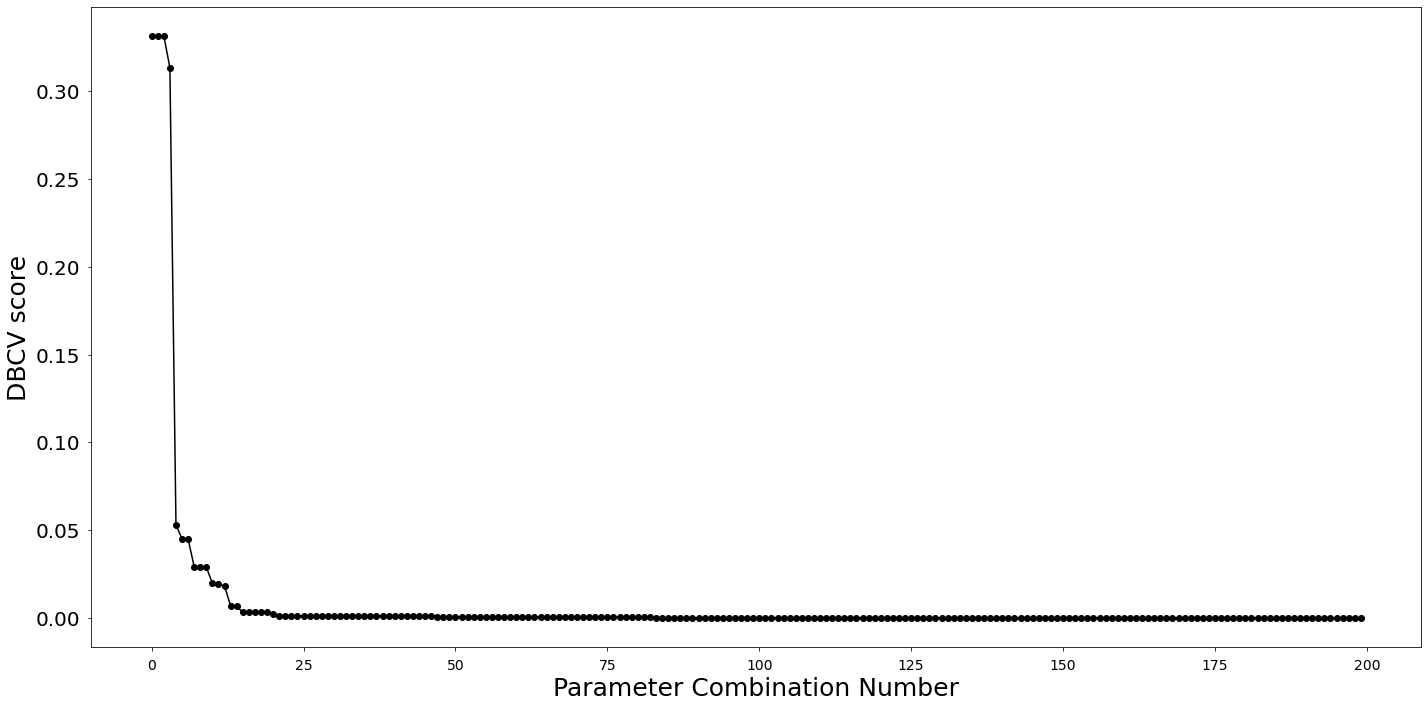

In [19]:
fig, ax1 = plt.subplots(figsize=(20, 10))

# color = 'tab:red'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', fontsize=25) # , color=color
ax1.plot(np.arange(200), res_df_18['dbcv_score'][:200], marker='o', color="black") # , color=color
ax1.tick_params(axis='y', labelsize=20) # , labelcolor=color

# horiz_line_data = np.array([res_df_18['dbcv_score'].max() for i in range(res_df_18.shape[0])])
# ax1.plot(horiz_line_data, 'b--')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('silhoutte score', color=color)  # we already handled the x-label with ax1
# ax2.plot(res_df_18['silhouette_score'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# fig.savefig('./HDBSCAN_DBCV_18.png', bbox_inches='tight')   # save the figure to file


plt.show()

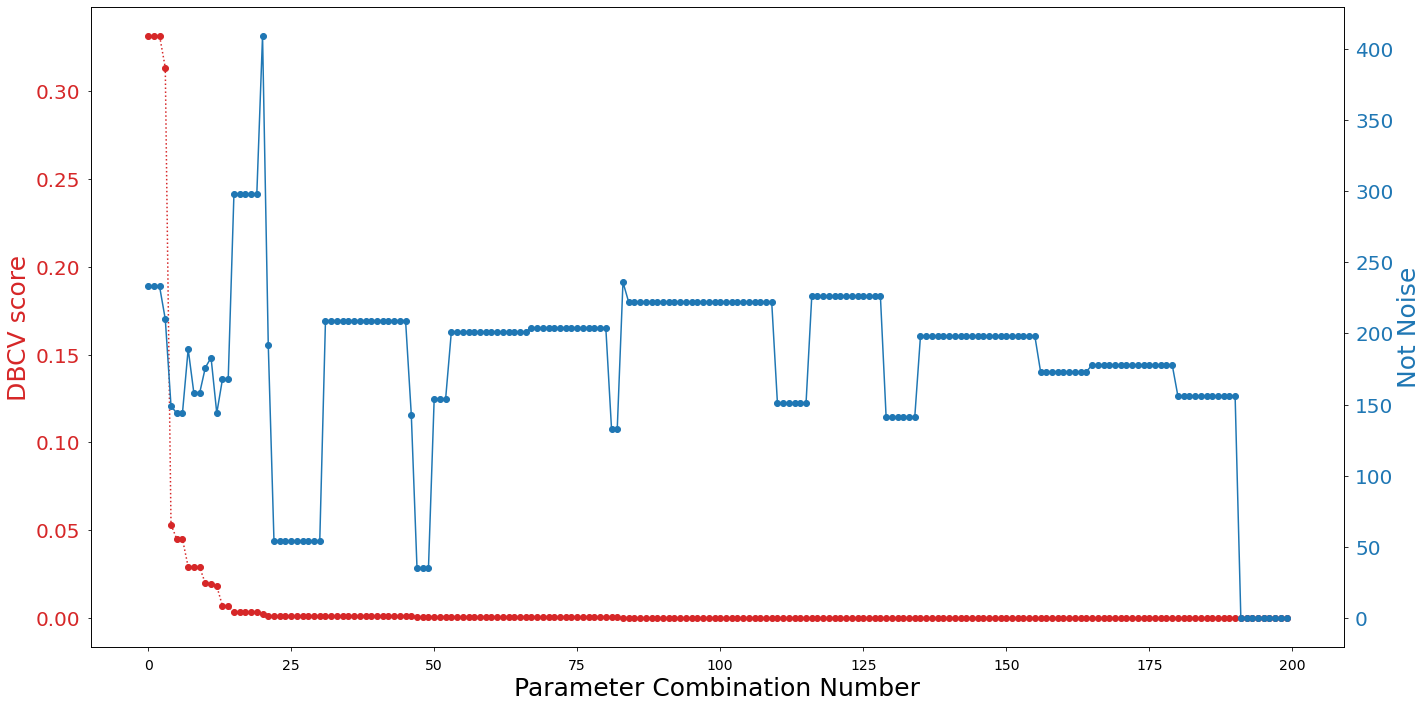

In [20]:
fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:red'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_18['dbcv_score'][:200], color=color, linestyle=':', marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Not Noise', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(np.arange(200), res_df_18['non_noise'][:200], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

y_points = [210, 233, 233, 233]
x_points = [3, 38, 56, 74]


# ax2.scatter(x_points, y_points, color='red')


fig.tight_layout()  # otherwise the right y-label is slightly clipped

# fig.savefig('./HDBSCAN_non_noise_18.png', bbox_inches='tight')   # save the figure to file


plt.show()

### Max DBCV

In [21]:
res_df_18[res_df_18['dbcv_score'] > 0.3]

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
56,5,0.076538,0.331322,0.510241,8,4,233
38,5,0.076538,0.331322,0.510241,7,4,233
74,5,0.076538,0.331322,0.510241,9,4,233
3,5,0.079911,0.313232,0.416054,5,5,210


In [22]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=7, min_samples=4, gen_min_span_tree=True, metric = "euclidean")
clusterer.fit(X_scaled)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=7, min_samples=4)

In [23]:
clusterer.relative_validity_, silhouette_score(X_scaled[clusterer.labels_ != -1], clusterer.labels_[clusterer.labels_ != -1] , metric='euclidean') * sum(clusterer.labels_ != -1)/df.shape[0]

(0.3313219146371114, 0.07653811963876217)

In [24]:
sum(clusterer.labels_ != -1)

233

In [25]:
for i in set(clusterer.labels_):
    print(f'Cluser {i} has {sum(clusterer.labels_ ==i)} wards')

Cluser 0 has 10 wards
Cluser 1 has 203 wards
Cluser 2 has 10 wards
Cluser 3 has 10 wards
Cluser -1 has 275 wards


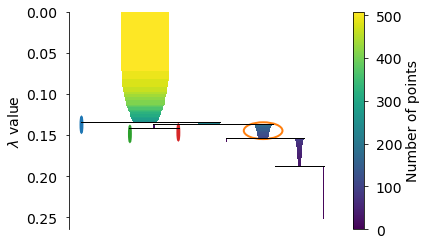

In [26]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [27]:
df_cluster = pd.concat([df_labels, pd.DataFrame(clusterer.labels_, columns=["Cluster"])], axis=1, sort=False)
df_cluster.head()

,ward_no.,Municipality,Cluster
0,1,Emfuleni,1
1,2,Emfuleni,1
2,3,Emfuleni,1
3,4,Emfuleni,1
4,5,Emfuleni,-1


In [28]:
# df_cluster.to_csv("HDBSCAN_clusters_18.csv")

## 6 PCs

In [29]:
min_cluster_sizes = np.arange(5, 50, 1)
min_samples = np.arange(2, 20, 1) 
hdbscan_params = list(product(min_cluster_sizes, min_samples))
no_of_clusters = []
sil_score = []
dbcv_score = []
davies_score = []
min_cluster_size = []
min_sample = []
non_noise = []
for p in hdbscan_params:
    hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=p[0].item(), gen_min_span_tree=True, metric = "euclidean", min_samples=p[1].item()).fit(X_scaled.iloc[:,:6])
    min_cluster_size.append(p[0])
    min_sample.append(p[1])
    no_of_clusters.append(len(np.unique(hdbscan_cluster.labels_)))
    non_noise.append(sum(hdbscan_cluster.labels_ != -1))
    dbcv_score.append(hdbscan_cluster.relative_validity_)
    try:
        sil_score.append(silhouette_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df.shape[0])
        davies_score.append(davies_bouldin_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df.shape[0])
    except ValueError:     
        sil_score.append(0)
        davies_score.append(0)
#     pca_dbcv.append(DBCV(X_scaled.to_numpy(), pca_dbscan_cluster.labels_, dist_function=euclidean))
res = list(zip(no_of_clusters, sil_score, dbcv_score, davies_score, min_cluster_size, min_sample, non_noise))
res_df_6 = pd.DataFrame(res, columns=['no_of_clusters', 'silhouette_score', 'dbcv_score', 'davies_score', 'min_cluster_size', 'min_samples', 'non_noise'])
res_df_6.sort_values(by=['dbcv_score'], inplace=True, ascending=False)
res_df_6

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
1,9,0.063790,0.090398,0.436506,5,3,177
19,9,0.063790,0.090398,0.436506,6,3,177
37,8,0.067535,0.090356,0.424425,7,3,171
73,8,0.067535,0.090356,0.424425,9,3,171
55,8,0.067535,0.090356,0.424425,8,3,171
...,...,...,...,...,...,...,...
403,1,0.000000,0.000000,0.000000,27,9,0
404,1,0.000000,0.000000,0.000000,27,10,0
406,1,0.000000,0.000000,0.000000,27,12,0
407,1,0.000000,0.000000,0.000000,27,13,0


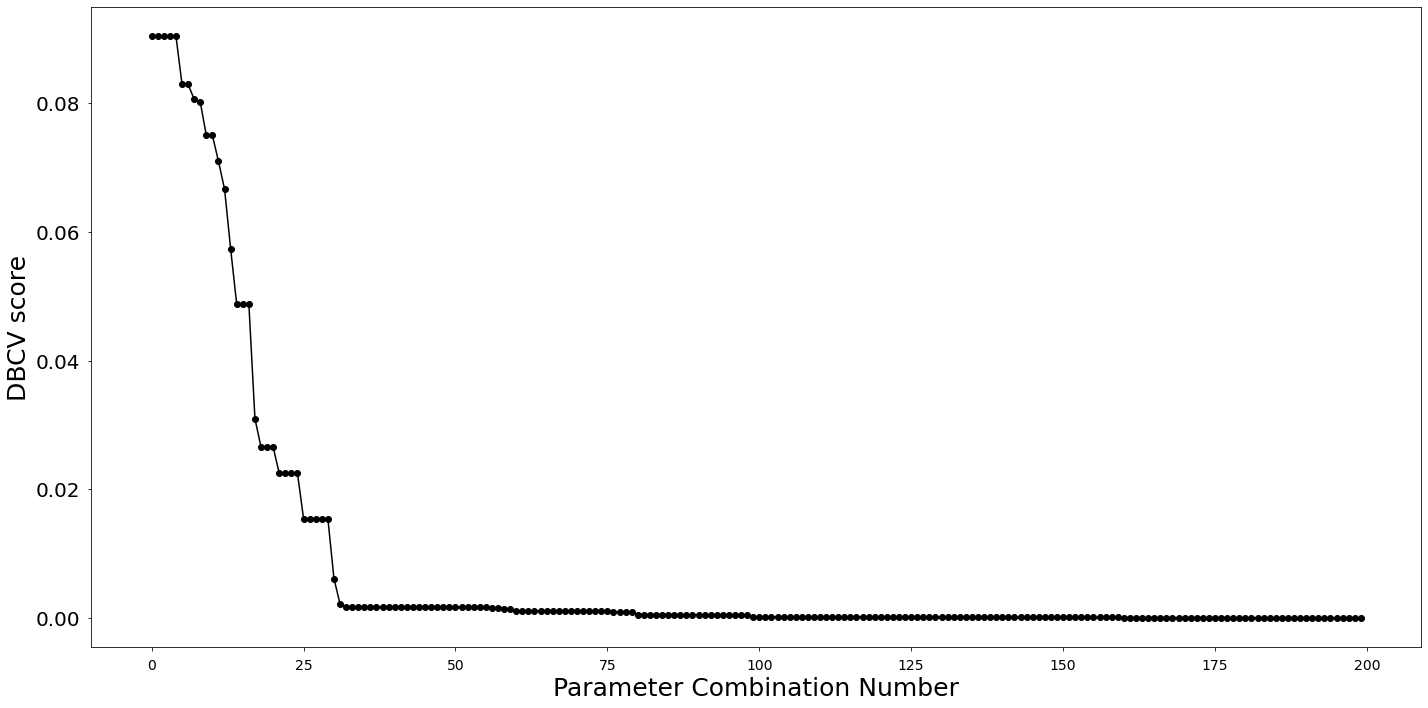

In [32]:
fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'black'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_6['dbcv_score'][:200], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# fig.savefig('./HDBSCAN_DBCV_6.png', bbox_inches='tight')   # save the figure to file

plt.show()

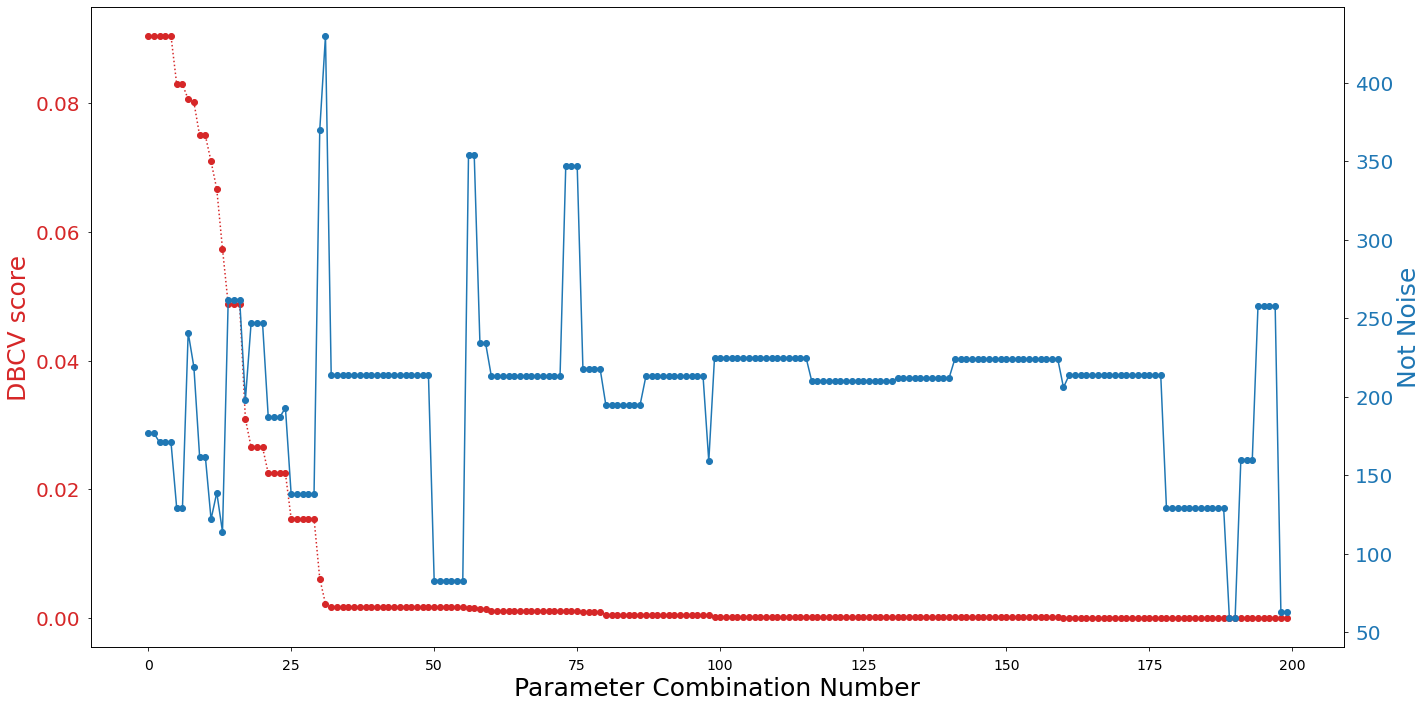

In [138]:
fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:red'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_6['dbcv_score'][:200], color=color, linestyle=':', marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Not Noise', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(np.arange(200), res_df_6['non_noise'][:200], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

# fig.savefig('./HDBSCAN_non_noise_6.png', bbox_inches='tight')   # save the figure to file


plt.show()

### Max DBCV

In [94]:
res_df_6[res_df_6['dbcv_score'] > 0.08]

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
19,9,0.063790,0.090398,0.436506,6,3,177
1,9,0.063790,0.090398,0.436506,5,3,177
73,8,0.067535,0.090356,0.424425,9,3,171
55,8,0.067535,0.090356,0.424425,8,3,171
37,8,0.067535,0.090356,0.424425,7,3,171
20,9,0.078971,0.082858,0.272564,6,4,129
38,9,0.078971,0.082858,0.272564,7,4,129
108,9,0.015358,0.080559,0.743328,11,2,241
126,7,0.007490,0.080110,0.706522,12,2,219


In [58]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=11, min_samples=2, gen_min_span_tree=True, metric = "euclidean")
clusterer.fit(X_scaled.iloc[:,:6])

HDBSCAN(gen_min_span_tree=True, min_cluster_size=11, min_samples=2)

In [59]:
clusterer.relative_validity_, silhouette_score(X_scaled[clusterer.labels_ != -1], clusterer.labels_[clusterer.labels_ != -1] , metric='euclidean') * sum(clusterer.labels_ != -1)/df.shape[0]

(0.08055937347338354, 0.015357643896475464)

In [60]:
sum(clusterer.labels_ != -1)

241

In [61]:
for i in set(clusterer.labels_):
    print(f'Cluser {i} has {sum(clusterer.labels_ == i)} wards')

Cluser 0 has 16 wards
Cluser 1 has 12 wards
Cluser 2 has 11 wards
Cluser 3 has 11 wards
Cluser 4 has 19 wards
Cluser 5 has 13 wards
Cluser 6 has 12 wards
Cluser 7 has 147 wards
Cluser -1 has 267 wards


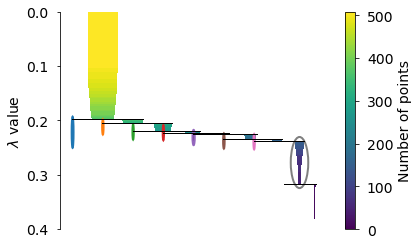

In [62]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [63]:
df_cluster = pd.concat([df_labels, pd.DataFrame(clusterer.labels_, columns=["Cluster"])], axis=1, sort=False)
df_cluster.head()

,ward_no.,Municipality,Cluster
0,1,Emfuleni,6
1,2,Emfuleni,-1
2,3,Emfuleni,-1
3,4,Emfuleni,7
4,5,Emfuleni,-1


In [112]:
# df_cluster.to_csv("HDBSCAN_clusters_6.csv")

## Visualizing Clusters with t-SNE

In [24]:
from sklearn.manifold import TSNE

X_embedded = pd.DataFrame(TSNE(n_components=2, random_state=2020).fit_transform(X_scaled))
X_embedded.shape

(508, 2)

In [25]:
X_embedded['cluster'] = clusterer.labels_
X_embedded.head()

,0,1,cluster
0,3.421132,4.354582,1
1,-10.869209,-3.919618,1
2,-4.850081,0.819569,1
3,8.016070,0.907411,1
4,-10.251584,16.118475,-1


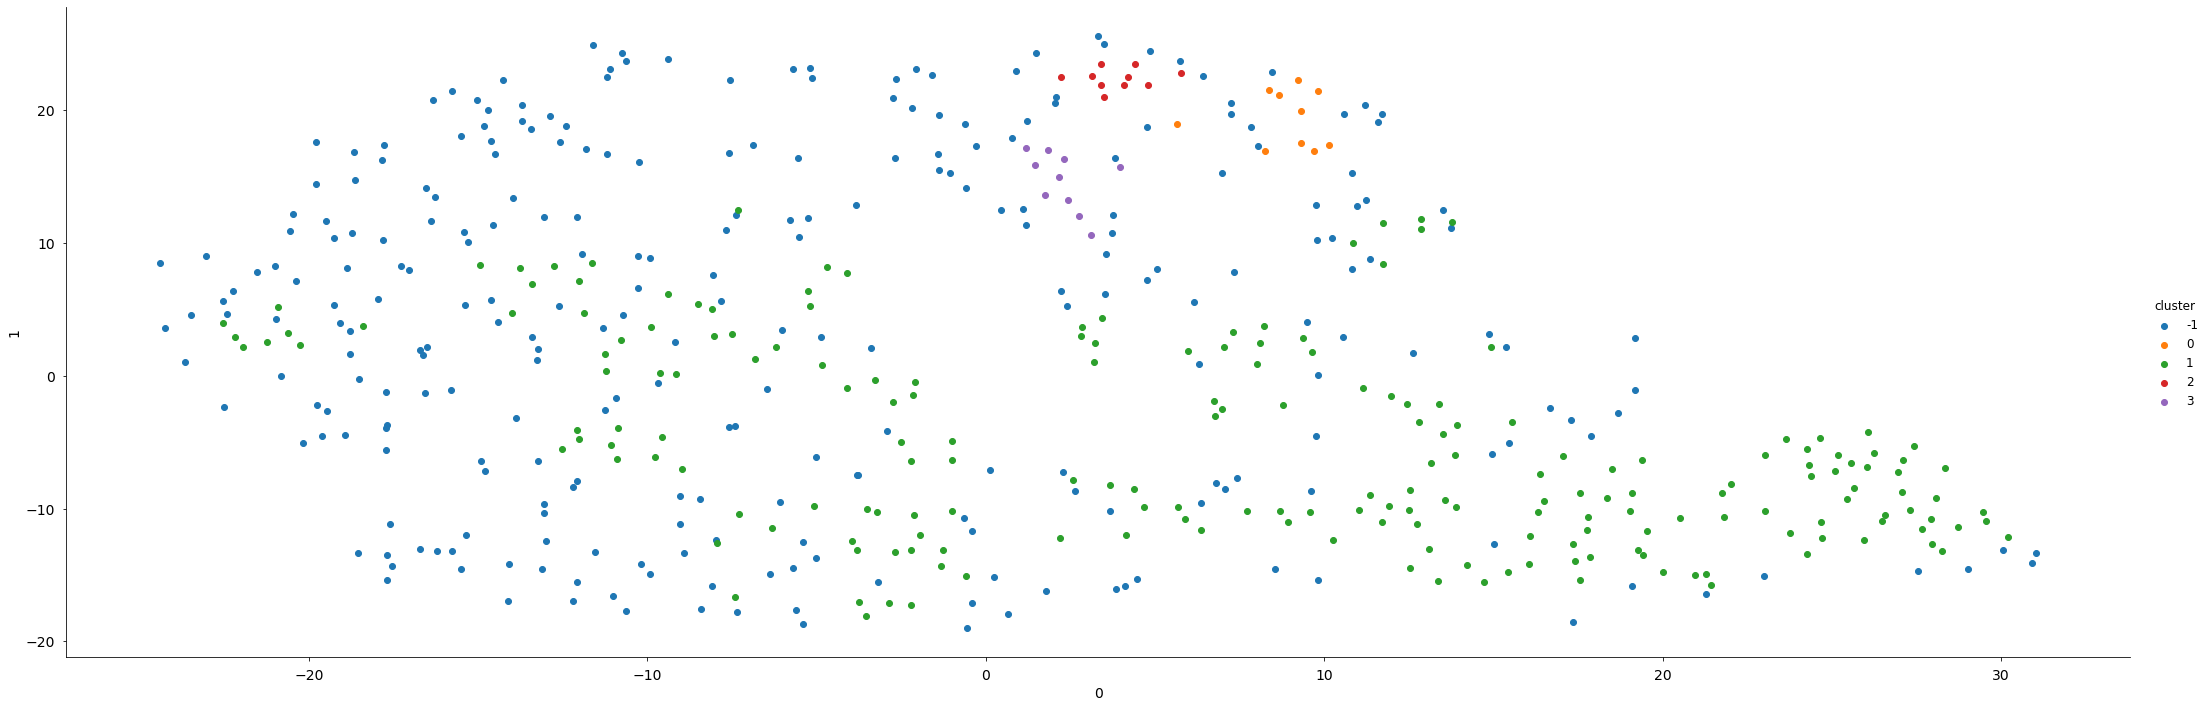

In [26]:
fg = sns.FacetGrid(data=X_embedded, hue='cluster', aspect=3, height=10)
fg.map(plt.scatter, 0, 1).add_legend()

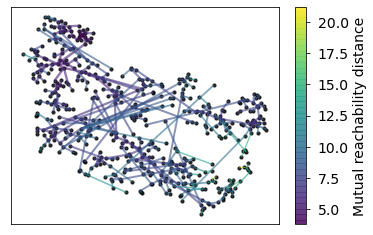

In [32]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=10,
                                      edge_linewidth=1)

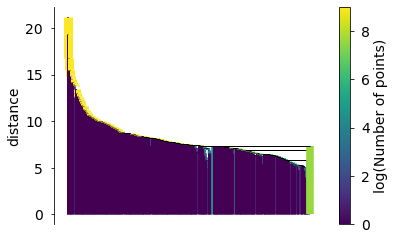

In [33]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

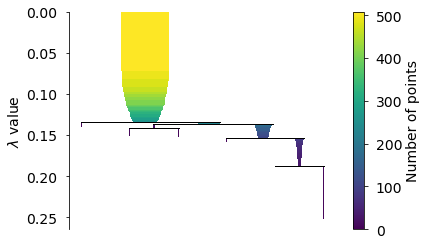

In [34]:
clusterer.condensed_tree_.plot()

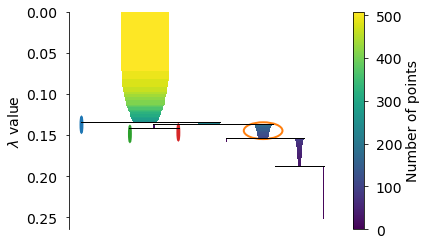

In [35]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

## UMAP

In [37]:
import umap

In [38]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30, # 30
    min_dist=0.0,
    n_components=18,
    random_state=42,
).fit_transform(df)

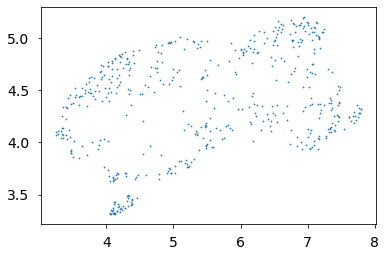

In [39]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
             s=0.5, cmap='Spectral');

In [40]:
X = pd.DataFrame(clusterable_embedding).iloc[:,:18]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6.314995,4.349174,3.266186,5.509706,5.274659,6.432049,5.591256,4.645926,6.961758,3.834292,4.460970,7.827258,6.121856,5.046837,5.125311,4.626855,4.997023,6.170087
1,5.304955,4.965321,3.315800,5.462599,5.464440,6.292080,5.108047,3.821249,6.252724,3.903327,3.681150,8.596388,6.227995,4.358994,5.534655,4.470030,4.821062,5.936026
2,4.711304,4.480486,3.213601,5.526309,5.443814,6.510221,5.382390,3.895565,6.680025,3.844407,4.038368,8.454576,6.194681,4.728136,5.341722,4.637443,4.850914,6.201463
3,5.150460,4.119630,2.988060,5.650910,5.319744,6.662979,5.693005,4.223396,7.152916,3.671922,4.391577,8.143738,6.301621,5.080159,5.089032,4.965644,4.850440,6.407445
4,3.633459,3.965527,3.853211,5.069583,5.413174,6.260776,5.349054,4.165962,6.494946,4.379282,4.579310,8.117580,5.701000,4.827541,5.210605,4.143397,5.334149,6.358743


In [41]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,5.473301,4.368595,3.301201,5.466588,5.362729,6.457260,5.492744,4.330193,6.806545,3.897848,4.315485,8.093871,6.097033,4.930600,5.230710,4.577240,4.971799,6.191308
std,1.347734,0.490244,0.626952,0.432556,0.150082,0.273662,0.362684,0.436942,0.641649,0.498324,0.497571,0.411179,0.431704,0.412648,0.274927,0.598054,0.372484,0.262406
min,3.252887,3.309283,1.941026,4.762172,5.034514,5.957470,4.805873,3.562662,5.689538,2.883665,3.614684,7.213278,5.338813,4.131970,4.731877,3.709494,4.265966,5.672571
25%,4.186363,4.046377,2.787021,5.091955,5.256303,6.261646,5.190482,3.937669,6.285115,3.463332,3.914337,7.870715,5.813118,4.586773,4.999656,4.083310,4.686828,5.973746
50%,5.413874,4.383998,3.403753,5.436146,5.373076,6.418255,5.515039,4.353928,6.743125,3.950818,4.250799,8.091477,6.048952,4.940041,5.247372,4.427861,4.932648,6.205697
75%,6.799480,4.768923,3.797462,5.854803,5.483555,6.686775,5.718076,4.651045,7.213283,4.323079,4.532915,8.419605,6.435158,5.269433,5.467515,4.999418,5.205099,6.381706
max,7.786808,5.203039,4.264141,6.331820,5.693977,7.058320,6.203522,5.109313,8.130999,4.733210,5.566291,8.802075,7.040133,5.661546,5.743824,5.969975,5.784859,6.715806


In [42]:
scale = False
scaler = StandardScaler()


X_scaled = pd.DataFrame(scaler.fit_transform(X)) if scale else X
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6.314995,4.349174,3.266186,5.509706,5.274659,6.432049,5.591256,4.645926,6.961758,3.834292,4.460970,7.827258,6.121856,5.046837,5.125311,4.626855,4.997023,6.170087
1,5.304955,4.965321,3.315800,5.462599,5.464440,6.292080,5.108047,3.821249,6.252724,3.903327,3.681150,8.596388,6.227995,4.358994,5.534655,4.470030,4.821062,5.936026
2,4.711304,4.480486,3.213601,5.526309,5.443814,6.510221,5.382390,3.895565,6.680025,3.844407,4.038368,8.454576,6.194681,4.728136,5.341722,4.637443,4.850914,6.201463
3,5.150460,4.119630,2.988060,5.650910,5.319744,6.662979,5.693005,4.223396,7.152916,3.671922,4.391577,8.143738,6.301621,5.080159,5.089032,4.965644,4.850440,6.407445
4,3.633459,3.965527,3.853211,5.069583,5.413174,6.260776,5.349054,4.165962,6.494946,4.379282,4.579310,8.117580,5.701000,4.827541,5.210605,4.143397,5.334149,6.358743


## 18 Components

In [175]:
min_cluster_sizes = np.arange(5, 50, 1)
min_samples = np.arange(2, 30, 1) 
hdbscan_params = list(product(min_cluster_sizes, min_samples))
no_of_clusters = []
sil_score = []
dbcv_score = []
davies_score = []
min_cluster_size = []
min_sample = []
non_noise = []
for p in hdbscan_params:
    hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=p[0].item(), gen_min_span_tree=True, metric = "euclidean", min_samples=p[1].item()).fit(X_scaled)
    min_cluster_size.append(p[0])
    min_sample.append(p[1])
    no_of_clusters.append(len(np.unique(hdbscan_cluster.labels_)))
    non_noise.append(sum(hdbscan_cluster.labels_ != -1))
    dbcv_score.append(hdbscan_cluster.relative_validity_)
    try:
        sil_score.append(silhouette_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df.shape[0])
        davies_score.append(davies_bouldin_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df.shape[0])
    except ValueError:     
        sil_score.append(0)
        davies_score.append(0)
#     pca_dbcv.append(DBCV(X_scaled.to_numpy(), pca_dbscan_cluster.labels_, dist_function=euclidean))
res = list(zip(no_of_clusters, sil_score, dbcv_score, davies_score, min_cluster_size, min_sample, non_noise))
res_df_18 = pd.DataFrame(res, columns=['no_of_clusters', 'silhouette_score', 'dbcv_score', 'davies_score', 'min_cluster_size', 'min_samples', 'non_noise'])
res_df_18.sort_values(by=['dbcv_score'], inplace=True, ascending=False)
res_df_18

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
315,6,0.391493,0.510405,0.571403,16,9,469
595,5,0.402459,0.502493,0.572963,26,9,453
343,5,0.402459,0.502493,0.572963,17,9,453
399,5,0.402459,0.502493,0.572963,19,9,453
511,5,0.402459,0.502493,0.572963,23,9,453
...,...,...,...,...,...,...,...
988,4,0.446595,0.001204,0.661847,40,10,476
1212,4,0.446595,0.001204,0.661847,48,10,476
1184,4,0.446595,0.001204,0.661847,47,10,476
904,4,0.446595,0.001204,0.661847,37,10,476


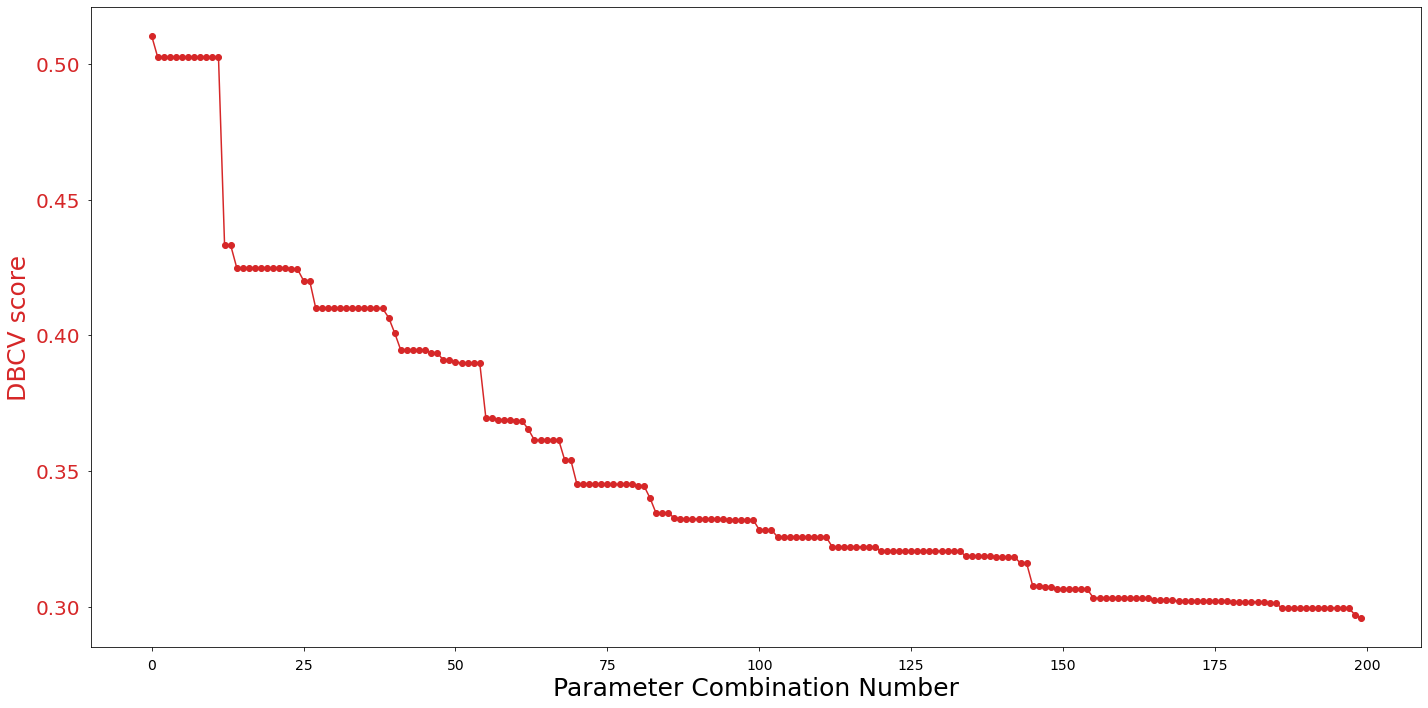

In [176]:
fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:red'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_18['dbcv_score'][:200], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

# horiz_line_data = np.array([res_df_18['dbcv_score'].max() for i in range(res_df_18.shape[0])])
# ax1.plot(horiz_line_data, 'b--')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('silhoutte score', color=color)  # we already handled the x-label with ax1
# ax2.plot(res_df_18['silhouette_score'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# fig.savefig('./HDBSCAN_DBCV_18.png', bbox_inches='tight')   # save the figure to file


plt.show()

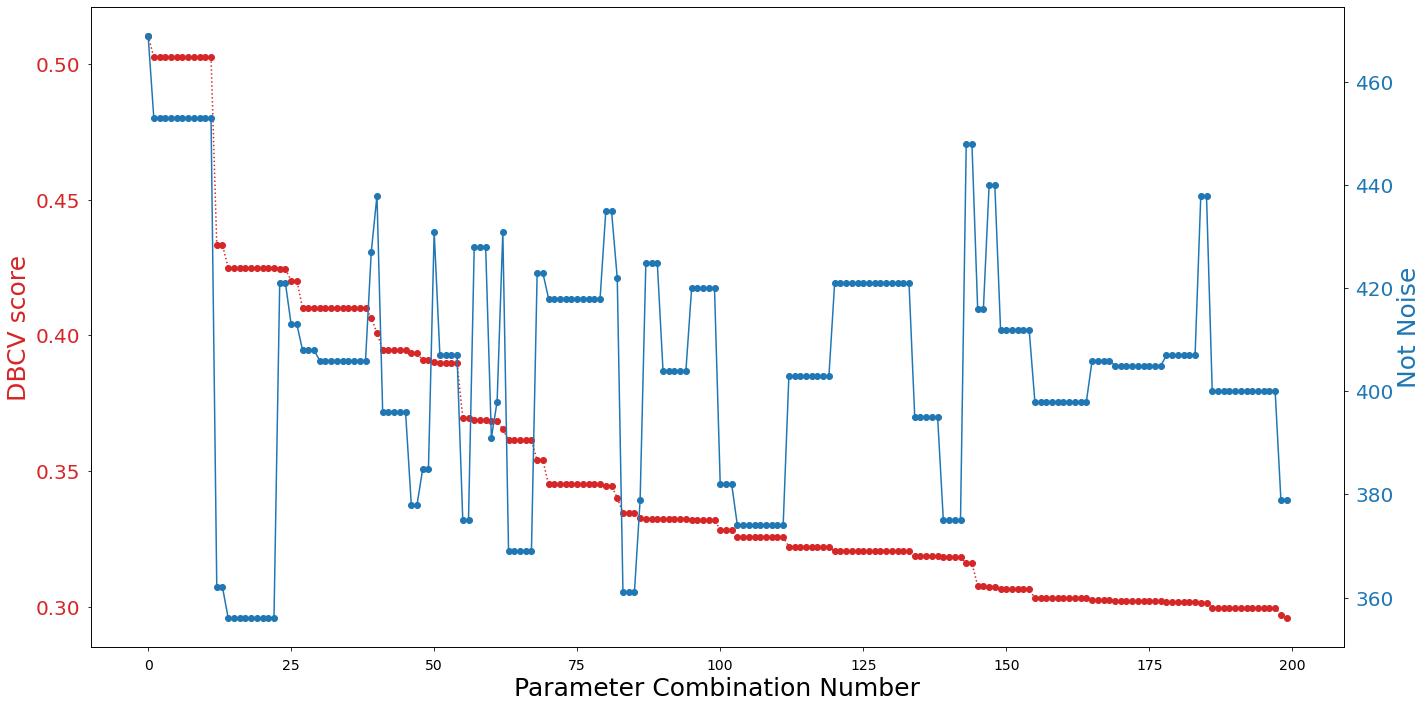

In [177]:
fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:red'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_18['dbcv_score'][:200], color=color, linestyle=':', marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Not Noise', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(np.arange(200), res_df_18['non_noise'][:200], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

y_points = [210, 233, 233, 233]
x_points = [3, 38, 56, 74]


# ax2.scatter(x_points, y_points, color='red')


fig.tight_layout()  # otherwise the right y-label is slightly clipped

# fig.savefig('./HDBSCAN_non_noise_18.png', bbox_inches='tight')   # save the figure to file


plt.show()

### Max DBCV

In [178]:
res_df_18[res_df_18['dbcv_score'] > 0.45]

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
315,6,0.391493,0.510405,0.571403,16,9,469
595,5,0.402459,0.502493,0.572963,26,9,453
343,5,0.402459,0.502493,0.572963,17,9,453
399,5,0.402459,0.502493,0.572963,19,9,453
511,5,0.402459,0.502493,0.572963,23,9,453
427,5,0.402459,0.502493,0.572963,20,9,453
371,5,0.402459,0.502493,0.572963,18,9,453
539,5,0.402459,0.502493,0.572963,24,9,453
567,5,0.402459,0.502493,0.572963,25,9,453
455,5,0.402459,0.502493,0.572963,21,9,453


In [181]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=16, min_samples=9, gen_min_span_tree=True, metric = "euclidean")
clusterer.fit(X_scaled)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=16, min_samples=9)

In [182]:
clusterer.relative_validity_, silhouette_score(X_scaled[clusterer.labels_ != -1], clusterer.labels_[clusterer.labels_ != -1] , metric='euclidean') * sum(clusterer.labels_ != -1)/df.shape[0]

(0.510404922896887, 0.3914926996615928)

In [183]:
sum(clusterer.labels_ != -1)

469

In [184]:
for i in set(clusterer.labels_):
    print(f'Cluser {i} has {sum(clusterer.labels_ ==i)} wards')

Cluser 0 has 16 wards
Cluser 1 has 158 wards
Cluser 2 has 227 wards
Cluser 3 has 41 wards
Cluser 4 has 27 wards
Cluser -1 has 39 wards


In [185]:
df_cluster = pd.concat([df_labels, pd.DataFrame(clusterer.labels_, columns=["Cluster"])], axis=1, sort=False)
df_cluster.head()

,ward_no.,Municipality,Cluster
0,1,Emfuleni,2
1,2,Emfuleni,1
2,3,Emfuleni,1
3,4,Emfuleni,2
4,5,Emfuleni,-1


In [160]:
# df_cluster.to_csv("HDBSCAN_clusters_UMAP.csv")

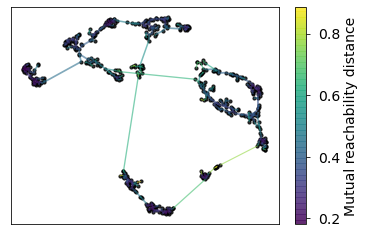

In [186]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=10,
                                      edge_linewidth=1)

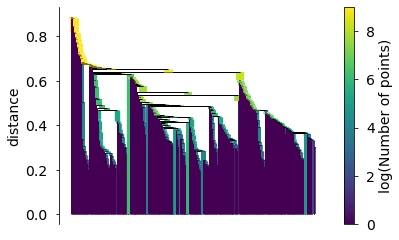

In [187]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

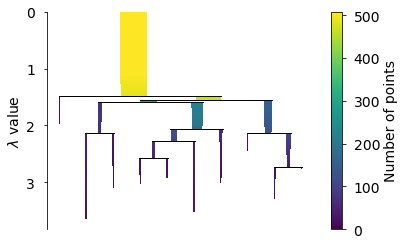

In [188]:
clusterer.condensed_tree_.plot()

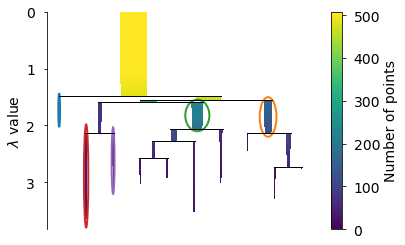

In [189]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

0.45374355

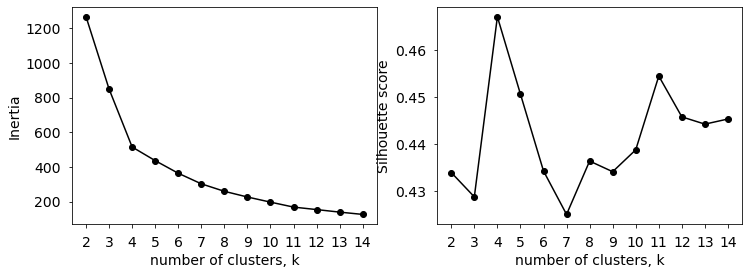

In [43]:
ks = range(2, 15)
inertias = []
sil = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++')
    
    # Fit model to samples
    model.fit(X_scaled)
    kmeans_model = KMeans(init='k-means++', n_clusters=k, n_init=10).fit(X_scaled)
    labels = kmeans_model.labels_
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
    #Append sillhouette scores
    sil.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))
    
    
#both inertia and sil
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(ks, inertias, '-o', color='black')
ax[0].set_xlabel('number of clusters, k')
ax[0].set_ylabel('Inertia')
ax[0].set_xticks(ks)

ax[1].plot(ks, sil, '-o', color='black')
ax[1].set_xlabel('number of clusters, k')
ax[1].set_ylabel('Silhouette score')
ax[1].set_xticks(ks)

#for code on silhouettes:
#https://towardsdatascience.com/k-means-clustering-for-unsupervised-machine-learning-afd96fbd37ac
kmeans_model = KMeans(init='k-means++', n_clusters=5, n_init=10).fit(X_scaled)
labels = kmeans_model.labels_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')
